In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv")
customers

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
prod_cat = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
transactions = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [36]:
## 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have
## done transactions with us and select the join type accordingly.

In [6]:
table = pd.merge(transactions, prod_cat, how = 'left', left_on = ["prod_subcat_code", "prod_cat_code"], right_on = ["prod_sub_cat_code", "prod_cat_code"])
table

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children


In [7]:
retail = pd.merge(table, customers, how = 'left', left_on = "cust_id", right_on = "customer_Id")
retail

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,22-05-1970,M,2.0


In [8]:
retail.drop(["prod_subcat_code", "customer_Id"], axis = 1)
retail = retail[["transaction_id", "cust_id", "tran_date", "Qty", "Rate", "Tax", "total_amt", "Store_type", "prod_cat", "prod_cat_code", "prod_subcat", "prod_sub_cat_code", "DOB", "Gender", "city_code"]]
retail

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,1,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,-5,-1497,785.925,-8270.925,e-Shop,Electronics,3,Computers,5,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,-2,-791,166.110,-1748.110,TeleShop,Books,5,DIY,6,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,6,Bath,11,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,-2,-791,166.110,-1748.110,TeleShop,Books,5,DIY,6,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,1,1264,132.720,1396.720,e-Shop,Books,5,Academic,12,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,1,677,71.085,748.085,e-Shop,Clothing,1,Mens,4,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,4,1052,441.840,4649.840,MBR,Home and kitchen,6,Furnishing,2,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,3,1142,359.730,3785.730,TeleShop,Books,5,Children,11,22-05-1970,M,2.0


In [37]:
## 2. Prepare a summary report for the merged data set.
##   a. Get the column names and their corresponding data types
##   b. Top/Bottom 10 observations
##   c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
##   d. Frequency tables for all the categorical variables

In [9]:
##a. 
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   prod_cat           23053 non-null  object 
 9   prod_cat_code      23053 non-null  int64  
 10  prod_subcat        23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  DOB                23053 non-null  object 
 13  Gender             23044 non-null  object 
 14  city_code          23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


In [10]:
## b.
retail.head(5)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,1,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,-5,-1497,785.925,-8270.925,e-Shop,Electronics,3,Computers,5,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,-2,-791,166.110,-1748.110,TeleShop,Books,5,DIY,6,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,6,Bath,11,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,-2,-791,166.110,-1748.110,TeleShop,Books,5,DIY,6,27-07-1992,M,8.0


In [11]:
retail.tail(5)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,DOB,Gender,city_code
23048,94340757522,274550,25-01-2011,1,1264,132.720,1396.720,e-Shop,Books,5,Academic,12,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,1,677,71.085,748.085,e-Shop,Clothing,1,Mens,4,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,4,1052,441.840,4649.840,MBR,Home and kitchen,6,Furnishing,2,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,3,1142,359.730,3785.730,TeleShop,Books,5,Children,11,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,1,447,46.935,493.935,TeleShop,Books,5,Children,11,15-01-1982,M,1.0


In [12]:
## c.
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
prod_sub_cat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [13]:
## d. Frequency tables for all the categorical variables
print(retail.Store_type.value_counts())
print(retail.prod_cat.value_counts())
print(retail.prod_subcat.value_counts())
print(retail.Gender.value_counts())
print(retail.city_code.value_counts())

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64
Gender
M    11811
F    11233
Name: count, dtype: int64
city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2

In [63]:
## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   prod_cat           23053 non-null  object 
 9   prod_cat_code      23053 non-null  int64  
 10  prod_subcat        23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  DOB                23053 non-null  object 
 13  Gender             23044 non-null  object 
 14  city_code          23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


In [15]:
retail.loc[:, ["transaction_id", "cust_id", "prod_cat_code", "prod_sub_cat_code"]].astype(str)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   prod_cat           23053 non-null  object 
 9   prod_cat_code      23053 non-null  int64  
 10  prod_subcat        23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  DOB                23053 non-null  object 
 13  Gender             23044 non-null  object 
 14  city_code          23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


<Axes: ylabel='Frequency'>

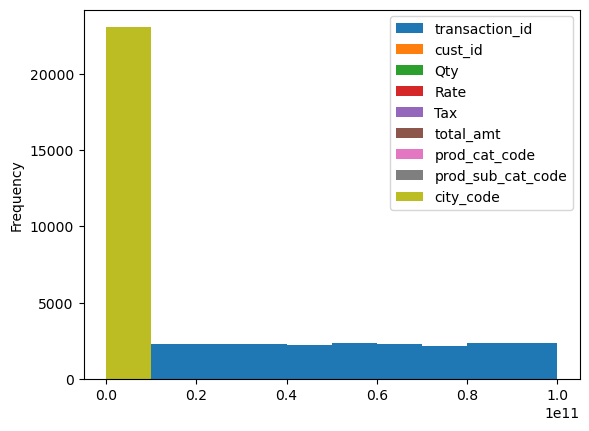

In [16]:
retail.select_dtypes('number').plot(kind = "hist")

<Axes: xlabel='Store_type'>

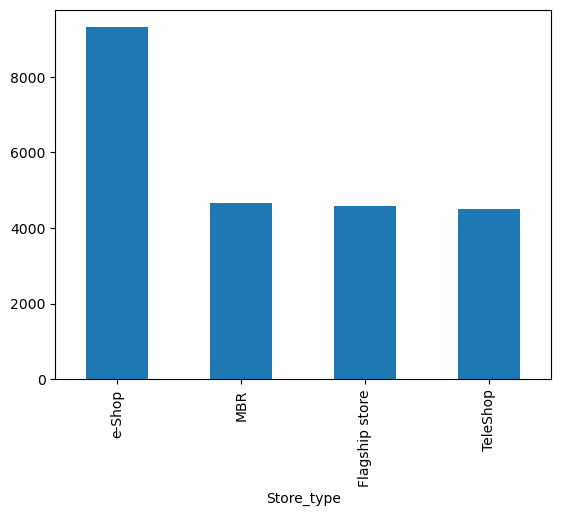

In [17]:
retail.Store_type.value_counts().plot(kind = "bar")

<Axes: xlabel='prod_cat'>

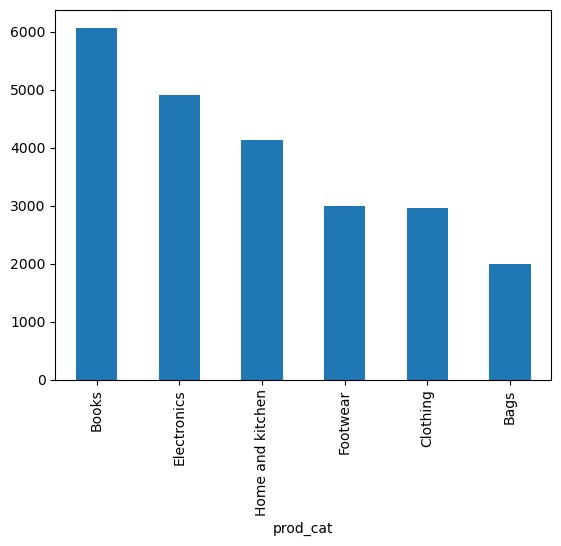

In [18]:
retail.prod_cat.value_counts().plot(kind = "bar")

<Axes: xlabel='prod_subcat'>

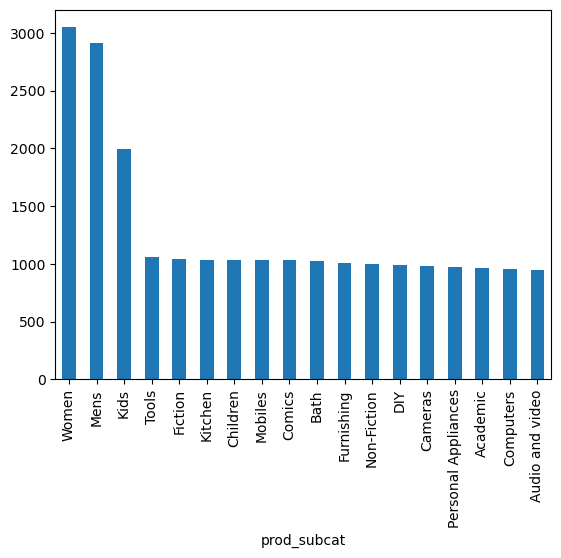

In [90]:
retail.prod_subcat.value_counts().plot(kind = "bar")

<Axes: xlabel='Gender'>

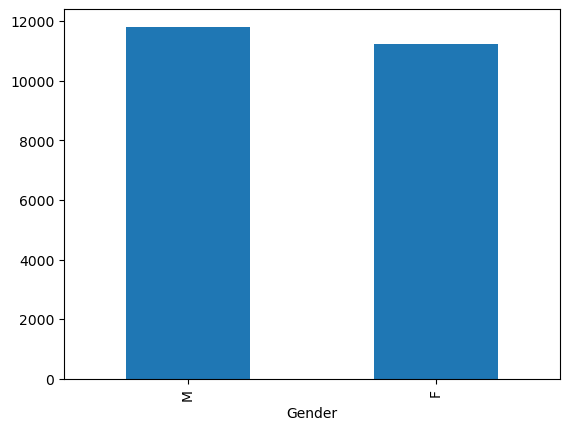

In [19]:
retail.Gender.value_counts().plot(kind = "bar")

<Axes: xlabel='city_code'>

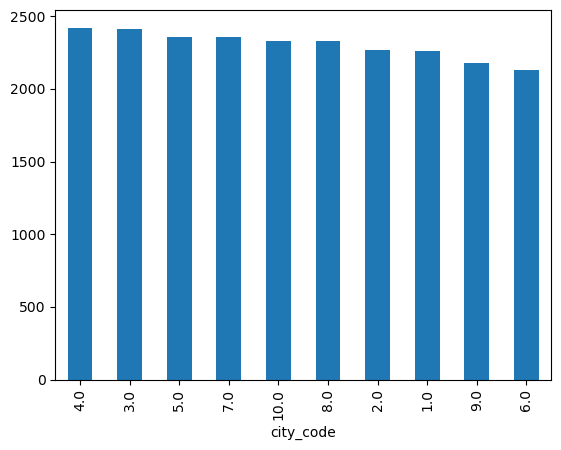

In [20]:
retail.city_code.value_counts().plot(kind = "bar")

In [93]:
## 4. Calculate the following information using the merged dataset :
##   a. Time period of the available transaction data
##   b. Count of transactions where the total amount of transaction was negative

In [21]:
##a.
retail.loc[:, "tran_date"] = retail.loc[:, "tran_date"].replace('/', '-')

In [22]:
retail.loc[:, "tran_date"] = pd.to_datetime(retail.loc[:, "tran_date"], format = "mixed")
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   prod_cat           23053 non-null  object 
 9   prod_cat_code      23053 non-null  int64  
 10  prod_subcat        23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  DOB                23053 non-null  object 
 13  Gender             23044 non-null  object 
 14  city_code          23045 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


In [23]:
retail.sort_values(by = "tran_date", ignore_index = True).head(5)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,DOB,Gender,city_code
0,36332303449,268624,2011-01-02 00:00:00,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,6,Kitchen,10,18-09-1986,F,1.0
1,25374972356,268904,2011-01-02 00:00:00,5,821,431.025,4536.025,MBR,Home and kitchen,6,Furnishing,2,25-05-1990,M,5.0
2,15662366857,272756,2011-01-02 00:00:00,3,527,166.005,1747.005,e-Shop,Electronics,3,Computers,5,03-12-1975,F,9.0
3,28972634039,275227,2011-01-02 00:00:00,-1,-334,35.070,-369.070,MBR,Electronics,3,Cameras,9,23-09-1989,M,4.0
4,60041644943,267309,2011-01-02 00:00:00,1,392,41.160,433.160,Flagship store,Footwear,2,Women,3,08-04-1973,F,1.0


In [24]:
time_period = retail.loc[0, "tran_date"] - retail.loc[23052, "tran_date"]
time_period

Timedelta('1130 days 00:00:00')

In [25]:
## no. of transactions where total amount was negative
count = 0
for x in retail.total_amt:
    if x<0:
        count += 1

count

2177

In [128]:
## 5. Analyze which product categories are more popular among females vs male customers.

In [26]:
retail.groupby(['Gender', 'prod_cat'])['prod_cat'].count()

Gender  prod_cat        
F       Bags                 994
        Books               2949
        Clothing            1439
        Electronics         2328
        Footwear            1529
        Home and kitchen    1994
M       Bags                1004
        Books               3116
        Clothing            1518
        Electronics         2570
        Footwear            1469
        Home and kitchen    2134
Name: prod_cat, dtype: int64

In [29]:
retail.pivot_table(columns = retail.Gender, index = retail.prod_cat, aggfunc = 'count', values = 'Gender')

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


In [170]:
## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [30]:
retail.groupby('city_code')["transaction_id"].count().sort_values(ascending = False)

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: transaction_id, dtype: int64

In [31]:
for i in retail.city_code.unique():
    percent = ((retail.loc[retail.city_code == i, "city_code"].count()/retail.cust_id.count()).round(3))*100
    print( "city_code: ", i, '=', percent, '%')

city_code:  5.0 = 10.2 %
city_code:  8.0 = 10.100000000000001 %
city_code:  3.0 = 10.5 %
city_code:  6.0 = 9.2 %
city_code:  9.0 = 9.4 %
city_code:  1.0 = 9.8 %
city_code:  2.0 = 9.8 %
city_code:  10.0 = 10.100000000000001 %
city_code:  7.0 = 10.2 %
city_code:  4.0 = 10.5 %
city_code:  nan = 0.0 %


In [189]:
## 7. Which store type sells the maximum products by value and by quantity?

In [32]:
retail.groupby('Store_type')[['Qty', 'total_amt']].sum()

,Qty,total_amt
Store_type,,
Flagship store,11133,9.715688e+06
MBR,11194,9.674486e+06
TeleShop,10984,9.364781e+06
e-Shop,22763,1.982482e+07


In [200]:
## therefore the e-shop sells the most by quantity but the Flagship store sells the most by value

In [201]:
## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [33]:
cat_val = retail.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().reset_index()
flagship = cat_val[cat_val.Store_type == 'Flagship store']    
totals = flagship[(flagship.prod_cat == 'Electronics') | (flagship.prod_cat == 'Clothing')]
totals

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


In [210]:
## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [50]:
retail_m_e = retail[(retail.Gender=='M') & (retail.prod_cat=='Electronics')]
retail_m_e.total_amt.sum()

5703109.424999999

In [51]:
##10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [69]:
pos_retail = retail[(retail.total_amt>=0)]
tran_count = pos_retail.groupby("cust_id")["transaction_id"].count()
tran_count[(tran_count>=10)].count()

27

In [70]:
## 11. For all customers aged between 25 - 35, find out:
##    a. What was the total amount spent for “Electronics” and “Books” product categories?
##    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [84]:
retail['DOB'] = pd.to_datetime(retail.DOB, dayfirst = True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  object        
 3   Qty                23053 non-null  int64         
 4   Rate               23053 non-null  int64         
 5   Tax                23053 non-null  float64       
 6   total_amt          23053 non-null  float64       
 7   Store_type         23053 non-null  object        
 8   prod_cat           23053 non-null  object        
 9   prod_cat_code      23053 non-null  int64         
 10  prod_subcat        23053 non-null  object        
 11  prod_sub_cat_code  23053 non-null  int64         
 12  DOB                23053 non-null  datetime64[ns]
 13  Gender             23044 non-null  object        
 14  city_c

C:\Users\abira\AppData\Local\Temp\ipykernel_21980\3423724433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['DOB'] = pd.to_datetime(retail.DOB, dayfirst = True)


In [112]:
from datetime import datetime, date

In [113]:
def age(born): 
    today = date.today() 
    return today.year - born.year - ((today.month,  
                                      today.day) < (born.month,  
                                                    born.day)) 

retail['Age'] = retail['DOB'].apply(age)
retail.sample()

C:\Users\abira\AppData\Local\Temp\ipykernel_21980\2977070163.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Age'] = retail['DOB'].apply(age)


,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,DOB,Gender,city_code,Age
574,84059330192,272508,2014-01-23 00:00:00,2,272,57.12,601.12,MBR,Footwear,2,Mens,1,1972-11-05,M,9.0,51


In [138]:
retail_age = retail[(retail.Age.between(25,35))].reset_index()
category_amt = retail_age.groupby('prod_cat')['total_amt'].sum()
category_amt[['Books', 'Electronics']]

prod_cat
Books          2381373.345
Electronics    2040978.095
Name: total_amt, dtype: float64

In [141]:
##    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

retail_age['tran_date'] = pd.to_datetime(retail.tran_date)
retail_age.sample()

,index,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_cat_code,prod_subcat,prod_sub_cat_code,DOB,Gender,city_code,Age
2716,13696,65667119383,271116,2013-12-10,4,222,93.24,981.24,MBR,Footwear,2,Women,3,1992-01-04,M,3.0,32


In [143]:
start_date = pd.to_datetime('01-01-2014', dayfirst = True)
end_date = pd.to_datetime('01-03-2014', dayfirst = True)

In [147]:
retail_age_date = retail_age[retail_age.tran_date.between(start_date, end_date)]
retail_age_date.total_amt.sum()

1477797.165